# Testing the class 'GeneralizedAlgebraicKnot'

## Setup

In [1]:
%matplotlib inline
%load_ext pycodestyle_magic

In [2]:
# display full output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
# Import your preparse magic (assuming it's saved in a utility script or redefined here)
from IPython.core.magic import register_line_magic
import path
from gaknot.utility import import_sage

@register_line_magic
def preparse(line):
    """
    Custom magic to preparse a sage file using the gaknot utility logic.
    Usage: %preparse signature
    """
    # Assuming 'gaknot' is in the current directory or python path
    import os
    package_name = 'gaknot'
    # Get the path to the package
    path = os.path.dirname(os.path.abspath(package_name))
    
    try:
        import_sage(line.strip(), package=package_name, path=path)
        print(f"Successfully preparsed and reloaded: {line}")
    except Exception as e:
        print(f"Error during preparse: {e}")

# Registering the magic
# del preparse # Optional: allows re-running this cell to update the magic
register_line_magic(preparse)

<function preparse at 0x15a1f9940>

In [4]:
# Preparse the new class file
%preparse gaknot
from gaknot.gaknot import GeneralizedAlgebraicKnot

Successfully preparsed and reloaded: gaknot


## Tests

### Testing basic functionality

In [5]:
# Define a valid connected sum: T(2,3) # -T(2,3; 6,5)
desc1 = [(1, [(2, 3)]), (-1, [(2, 3), (6, 5)])]

knot1 = GeneralizedAlgebraicKnot(desc1)

# Test __str__
print("Human readable string:")
print(knot1)

# Test __repr__
print("\nDeveloper representation:")
knot1

Human readable string:
T(2,3) # -T(2,3; 6,5)

Developer representation:


GeneralizedAlgebraicKnot([(1, [(2, 3)]), (-1, [(2, 3), (6, 5)])])

### Testing validation and error handling

In [6]:
invalid_descriptions = [
    # 1. Not coprime
    ("Coprimality error", [(1, [(2, 4)])]),
    # 2. Not positive integers
    ("Positivity error", [(1, [(1, 3)])]),
    # 3. Bad sign
    ("Sign error", [(2, [(2, 3)])]),
    # 4. Bad structure (missing list for knot desc)
    ("Structure error", [(1, (2, 3))]) 
]

for error_name, bad_desc in invalid_descriptions:
    print(f"--- Testing {error_name} ---")
    try:
        GeneralizedAlgebraicKnot(bad_desc)
        print("FAIL: Exception was not raised!")
    except (ValueError, TypeError) as e:
        print(f"Caught expected error: {e}\n")

--- Testing Coprimality error ---
Caught expected error: Parameters p and q must be relatively prime. Got gcd(2, 4) != 1 at index 0, 0.

--- Testing Positivity error ---
Caught expected error: Parameters p and q must be > 1. Got (1, 3) at index 0, 0.

--- Testing Sign error ---
Caught expected error: Sign at index 0 must be 1 or -1. Got 2.

--- Testing Structure error ---
Caught expected error: Cable parameter at index 0, sub-index 0 must be a pair (p, q).



### Testing algebraic operations

In [7]:
# Define another knot: T(3,4)
knot2 = GeneralizedAlgebraicKnot([(1, [(3, 4)])])

# Test connected sum (__add__)
sum_knot = knot1 + knot2
print("Connected Sum:")
print(sum_knot)

# Test concordance inverse (__neg__)
inverse_knot = -knot1
print("\nConcordance Inverse:")
print(inverse_knot)

# Test combination
complex_knot = knot1 + (-knot2)
print("\nComplex Combination (knot1 - knot2):")
print(complex_knot)

Connected Sum:
T(2,3) # -T(2,3; 6,5) # T(3,4)

Concordance Inverse:
-T(2,3) # T(2,3; 6,5)

Complex Combination (knot1 - knot2):
T(2,3) # -T(2,3; 6,5) # -T(3,4)


In [8]:
# 1. Define the slice knot T(2,3) # -T(2,3)
desc = [(1, [(2, 3)]), (-1, [(2, 3)])]
slice_knot = GeneralizedAlgebraicKnot(desc)

# 2. Compute the signature directly from the object
sig_func = slice_knot.signature()

# 3. Verify it evaluates to 0 (since it's a slice knot)
print(f"Is the signature zero everywhere? {sig_func.is_zero_everywhere()}")

Is the signature zero everywhere? True


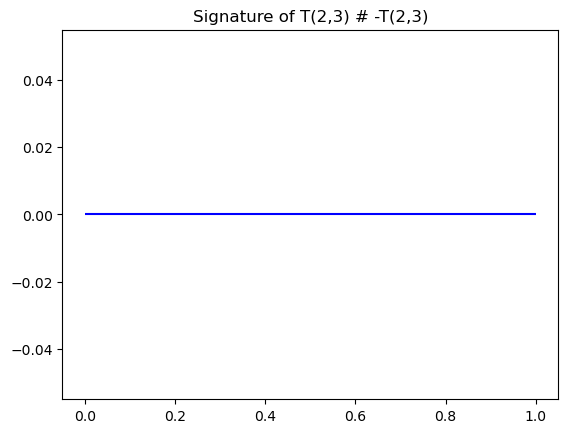

In [9]:
# 4. Plot it just to be sure
from gaknot.signature import SignaturePloter
SignaturePloter.plot(sig_func, title=f"Signature of {slice_knot}")

In [10]:
# Define the knot T(2,3;5,2) # T(3,2) # T(5,3) # -T(6,5)
desc = [
    (1, [(2,3), (5,2)]),
    (1, [(3,2)]),
    (1, [(5,3)]),
    (-1, [(6,5)])
]

alg_slice_knot = GeneralizedAlgebraicKnot(desc)

print(alg_slice_knot)

T(2,3; 5,2) # T(3,2) # T(5,3) # -T(6,5)


In [11]:
# compute the LT_signature
sig_f = alg_slice_knot.signature()

# 3. Verify if it evaluates to 0 (since it's an algebraically slice knot)
print(f"Is the signature zero everywhere? {sig_func.is_zero_everywhere()}")

Is the signature zero everywhere? True


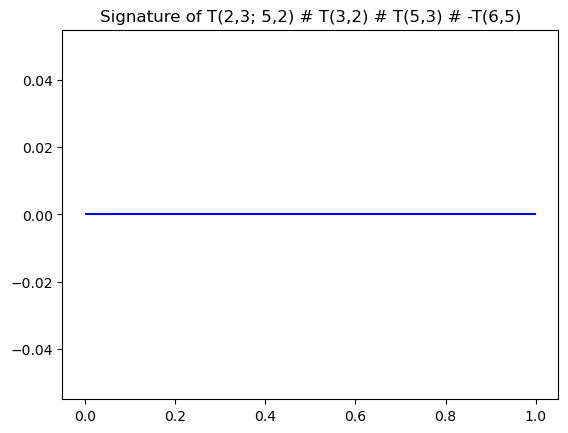

In [12]:
# Plot the signature function
from gaknot.signature import SignaturePloter
SignaturePloter.plot(sig_func, title=f"Signature of {alg_slice_knot}")

### Testing Alexander polynomial

In [16]:
# 1. Test for the Trefoil knot T(2,3)
desc_trefoil = [(1, [(2, 3)])]
knot_trefoil = GeneralizedAlgebraicKnot(desc_trefoil)

poly_trefoil = knot_trefoil.alexander_polynomial()
print(f"Alexander polynomial of {knot_trefoil}:")
print(poly_trefoil)
print("Expected: t^2 - t + 1\n")

Alexander polynomial of T(2,3):
t^2 - t + 1
Expected: t^2 - t + 1



In [17]:
# 2. Test for the connected sum T(2,3) # T(2,3)
# The polynomial should be the square of the Trefoil's polynomial
desc_sum = [(1, [(2, 3)]), (1, [(2, 3)])]
knot_sum = GeneralizedAlgebraicKnot(desc_sum)

poly_sum = knot_sum.alexander_polynomial()
print(f"Alexander polynomial of {knot_sum}:")
print(poly_sum)
print("Expected: t^4 - 2*t^3 + 3*t^2 - 2*t + 1\n")

Alexander polynomial of T(2,3) # T(2,3):
t^4 - 2*t^3 + 3*t^2 - 2*t + 1
Expected: t^4 - 2*t^3 + 3*t^2 - 2*t + 1



In [18]:
# 3. Test for an iterated torus knot T(2,3; 2,5)
# Using the cabling formula: Delta_{2,3; 2,5}(t) = Delta_{2,5}(t) * Delta_{2,3}(t^2)
# Delta_{2,5}(t) = t^4 - t^3 + t^2 - t + 1
# Delta_{2,3}(t^2) = t^4 - t^2 + 1
desc_cable = [(1, [(2, 3), (2, 5)])]
knot_cable = GeneralizedAlgebraicKnot(desc_cable)

poly_cable = knot_cable.alexander_polynomial()
print(f"Alexander polynomial of {knot_cable}:")
print(poly_cable)
print("Expected: t^8 - t^7 + t^5 - t^4 + t^3 - t + 1\n")

Alexander polynomial of T(2,3; 2,5):
t^8 - t^7 + t^4 - t + 1
Expected: t^8 - t^7 + t^5 - t^4 + t^3 - t + 1

